# Predicting Car Prices using KNN

In this project, we will use the K-nearest neighbors algorithm to predict car's market price using its attributes. The metric used to calculate the distance between observations is the Standard Euclidean. In this particular notebook, the validation process used is the train test method.

### Importing libraries and the prepared file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Importing the prepared csv file
numeric_cars = pd.read_csv("numeric_cars.csv")
price_col = numeric_cars['price']   
train_cols = numeric_cars.drop('price', axis=1).copy()

### Modeling

The metric used to calculate the distance between observations is the Standard Euclidean. The validation process used is the Train(75%)/Test(25%) method.

#### Univariate Models

- **First Model**

    - K = 5;
    - Metric: Standard Euclidean;
    - Validation Process: Train/Test Validation;
    - Features: trying every continuous numerical column.

In [3]:
def knn_train_test_uni(df, feature, target):
    np.random.seed(1)
    
    # Shuffling the dataframe rows
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # Create train and test dataframes
    last_train_row = int(len(df_shuffled)/2)
    train = df_shuffled.iloc[0:last_train_row].copy()
    test = df_shuffled.iloc[last_train_row:].copy()
    
    # Create model
    model = KNeighborsRegressor()
    
    # Fit a KNN model using the default k value of 5
    model.fit(train[[feature]], train[[target]])
    
    # Make predictions of the target variable of the test dataframe
    prediction = model.predict(test[[feature]])
    
    # Calculate MAE and RMSE
    mse = mean_squared_error(test[[target]], prediction)
    rmse = np.sqrt(mse)
    
    # Return RMSE
    return rmse

In [4]:
rmse_results_1 = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_value = knn_train_test_uni(numeric_cars, col, 'price')
    rmse_results_1[col] = rmse_value
    
rmse_results_series_1 = pd.Series(rmse_results_1)


sequence_best_avg_rmse = rmse_results_series_1.sort_values()
sequence_best_avg_rmse

engine-size          4095.373247
horsepower           4285.518611
highway-mpg          4598.414402
city-mpg             4814.778015
curb-weight          5166.828581
width                7110.412630
compression-rate     8096.301512
length               8304.189346
stroke               9337.295942
peak-rpm             9660.862212
wheel-base           9969.243292
height              10877.020175
bore                13397.091693
dtype: float64

Using the first univariate model, we can see that the features that provides the best 5 predictions are `engine-size`, `horsepower`, `highway-mpg`, `city-mpg`, `curb-weight`, all of those with RMSE values between 4100 and 5200. The sixth best feature is `width`, with a RMSE value of 7100, way above the first five. For this reason, we will continue our project taking into consideration only these first 5 columns.


- **Second Model**

    - K: testing the values from 1 to 10;
    - Metric: Standard Euclidean;
    - Validation Process: Train/Test Validation;
    - Features: testing the 5 best features observed in the first model.

In [5]:
def knn_train_test_uni_k(df, feature, target):
    np.random.seed(1)
    
    # Shuffling the dataframe rows
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # Create train and test dataframes
    last_train_row = int(len(df_shuffled)/2)
    train = df_shuffled.iloc[0:last_train_row].copy()
    test = df_shuffled.iloc[last_train_row:].copy()
    
    
    k_values = range(1,26)
    rmse_results = {}
    
    # Create loop for different k values
    for k in k_values:
    
        # Create model
        model = KNeighborsRegressor(n_neighbors = k)
    
        # Fit a KNN model using the given k value
        model.fit(train[[feature]], train[[target]])
    
        # Make predictions of the target variable of the test dataframe
        prediction = model.predict(test[[feature]])
    
        # Calculate MAE and RMSE
        mse = mean_squared_error(test[[target]], prediction)
        rmse = np.sqrt(mse)
        
        # Append rmse value to rmse_results
        rmse_results[k] = rmse
    
    # Return rmse_results (dictionary)
    return rmse_results


In [6]:
sorted_best_5_avg_rmse = sequence_best_avg_rmse[0:5].copy()
sorted_best_5 = sorted_best_5_avg_rmse.index

rmse_results_2 = {}

for col in sorted_best_5: #or train_cols, for all
        rmse_values = knn_train_test_uni_k(numeric_cars, col, 'price')
        rmse_results_2[col] = rmse_values
    
rmse_results_2

{'engine-size': {1: 5219.120167876255,
  2: 5118.82956024438,
  3: 4697.8745820380145,
  4: 4123.128309690146,
  5: 4095.373246834907,
  6: 4281.023074109285,
  7: 4088.875617417341,
  8: 4125.723342894426,
  9: 4073.4099256571567,
  10: 4010.9886710395876,
  11: 3894.8142756907173,
  12: 3821.2956580083005,
  13: 3855.2146524420673,
  14: 3919.1207540332152,
  15: 3910.1320985284874,
  16: 3994.1051268717756,
  17: 3942.151708149773,
  18: 3911.197099948417,
  19: 3878.4252410590666,
  20: 3886.643807192157,
  21: 3885.020280438856,
  22: 3932.996973039701,
  23: 3990.9934634383058,
  24: 4021.7169297728983,
  25: 4035.950968052359},
 'horsepower': {1: 7027.606971265131,
  2: 7100.278790370847,
  3: 5391.591335265744,
  4: 4769.0938924573775,
  5: 4285.518610667353,
  6: 3930.449322191094,
  7: 3847.2964471841346,
  8: 3651.5101633333816,
  9: 3442.466985707148,
  10: 3460.014284480901,
  11: 3393.6823705102815,
  12: 3418.7725414814877,
  13: 3545.526601608194,
  14: 3692.90292315523

In [7]:
rmse_results_2_df = pd.DataFrame(columns = rmse_results_2.keys(), index = range(1,26))

for col in rmse_results_2.keys():
    for k in range(1,26):
        rmse_value = rmse_results_2[col][k]
        rmse_results_2_df.loc[k, col] = rmse_value
    
rmse_results_2_df['mean_rmse_for_k'] = rmse_results_2_df.apply(np.mean, axis=1)
rmse_results_2_df.loc['mean_rmse_for_feature'] = rmse_results_2_df.apply(np.mean)
rmse_results_2_df

,engine-size,horsepower,highway-mpg,city-mpg,curb-weight,mean_rmse_for_k
1,5219.12,7027.61,5188.33,5347.15,6566.75,5869.792009
2,5118.83,7100.28,4671.09,5261.39,5701.88,5570.692968
3,4697.87,5391.59,4655.08,5210.26,5635.18,5117.998655
4,4123.13,4769.09,4570.51,5124.73,5495.98,4816.688977
5,4095.37,4285.52,4598.41,4814.78,5166.83,4592.182571
6,4281.02,3930.45,4245.53,4972.72,5144.74,4514.893267
7,4088.88,3847.3,4051.84,4575.95,5239.63,4360.719031
8,4125.72,3651.51,3926.52,4939.29,5339.75,4396.559633
9,4073.41,3442.47,3823.94,4770.34,5244.56,4270.943332
10,4010.99,3460.01,3717.65,4734.16,5133.92,4211.346575


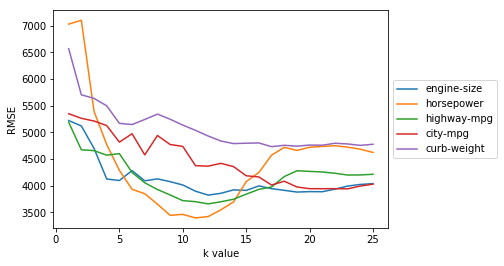

In [8]:
%matplotlib inline

for k,v in rmse_results_2.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(sorted_best_5, loc='center left', bbox_to_anchor=(1, 0.5))

The lowest RMSE value is 3338.83, and we obtain it using the `horsepower` feature, with the K value of 11. The K value with the lowest average RMSE is 12, with the value of 4080.14. 

The feature with the lowest average RMSE considering K values from 1 to 25 is `engine-size`, with a value of 4116.15. The `horsepower` feature, when considering a K value from 8 to 13, has lower RMSE values than any other feature, considering any K value from 1 to 25.

#### Multivariate Models

- **Third Model**

    - K: 5;
    - Metric: Standard Euclidean;
    - Validation Process: Train/Test Validation;
    - Features: multivariate, testing from the 2 best features to the 5 best features observed in the first model.

In [9]:
def knn_train_test_multi(df, feature, target):
    np.random.seed(1)
    
    # Shuffling the dataframe rows
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # Create train and test dataframes
    last_train_row = int(len(df_shuffled)/2)
    train = df_shuffled.iloc[0:last_train_row].copy()
    test = df_shuffled.iloc[last_train_row:].copy()
    
    # Create model
    model = KNeighborsRegressor()
    
    # Fit a KNN model using the default k value of 5
    model.fit(train[feature], train[target])
    
    # Make predictions of the target variable of the test dataframe
    prediction = model.predict(test[feature])
    
    # Calculate MAE and RMSE
    mse = mean_squared_error(test[target], prediction)
    rmse = np.sqrt(mse)
    
    # Return RMSE
    return rmse

In [10]:
rmse_results_3 = {}

for nr_best_feats in range(2,6):
    rmse_results_3['{} best features'.format(nr_best_feats)] = knn_train_test_multi(
        numeric_cars,
        sorted_best_5[:nr_best_feats],
        'price'
    )

rmse_results_3

{'2 best features': 3501.733879942991,
 '3 best features': 3553.981440358945,
 '4 best features': 3543.6021088353828,
 '5 best features': 3874.8264102159374}

We can see that, with the K value of 5, our model has superior performance using just the 2 best features. The difference is, however, very small in comparison to using 3 or 4 best features. Because of this, on the next step, we will do the hyperparameter tuning using the 2, 3 and 4 best features.

#### Hyperparameter Tuning

- **Fourth Model**

    - K: 1 to 25;
    - Metric: Standard Euclidean;
    - Validation Process: Train/Test Validation;
    - Features: multivariate, testing from the 2 best features to the 4 best features observed in the first model.

In [11]:
def knn_train_test_multi_k(df, features, target):
    np.random.seed(1)
    
    # Shuffling the dataframe rows
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # Create train and test dataframes
    last_train_row = int(len(df_shuffled)/2)
    train = df_shuffled.iloc[0:last_train_row].copy()
    test = df_shuffled.iloc[last_train_row:].copy()
    
    k_values = range(1, 26)
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[features], train[target])

        # Make predictions using model.
        prediction = knn.predict(test[features])

           
        # Calculate MAE and RMSE
        mse = mean_squared_error(test[target], prediction)
        rmse = np.sqrt(mse)
    
        
        k_rmses[k] = rmse
    return k_rmses

In [12]:
sorted_best_4 = sorted_best_5[0:-1]

rmse_results_4 = {}

for nr_best_feats in range(2,5):
    rmse_results_4['{} best features'.format(nr_best_feats)] = knn_train_test_multi_k(
        numeric_cars,
        sorted_best_4[:nr_best_feats],
        'price'
    )

rmse_results_4

{'2 best features': {1: 3434.8066471011575,
  2: 3631.9726464354667,
  3: 3569.267131945425,
  4: 3429.415059957798,
  5: 3501.733879942991,
  6: 3467.265620660381,
  7: 3295.1377118273913,
  8: 3254.83390351646,
  9: 3227.6389800293973,
  10: 3288.5418555407755,
  11: 3435.8470710041383,
  12: 3430.3733607959052,
  13: 3490.3888616332306,
  14: 3575.0519907920266,
  15: 3684.5426260962636,
  16: 3697.193952019634,
  17: 3689.4671575364555,
  18: 3647.7352889854774,
  19: 3708.2729115608295,
  20: 3688.82027264292,
  21: 3762.7172255402947,
  22: 3796.659579238184,
  23: 3799.5912645973453,
  24: 3754.1613736830964,
  25: 3661.6499746761087},
 '3 best features': {1: 3573.428345246881,
  2: 3918.785387510566,
  3: 4012.2889992124597,
  4: 3613.015900672851,
  5: 3553.981440358945,
  6: 3451.4337330349185,
  7: 3387.6562998182267,
  8: 3175.405256889689,
  9: 3077.2931249951084,
  10: 3205.004979499074,
  11: 3335.759981381083,
  12: 3501.7441190855247,
  13: 3644.6561170504287,
  14: 36

In [13]:
rmse_results_4_df = pd.DataFrame(columns = rmse_results_4.keys(), index = range(1,26))

for col in rmse_results_4.keys():
    for k in range(1,26):
        rmse_value = rmse_results_4[col][k]
        rmse_results_4_df.loc[k, col] = rmse_value
    
rmse_results_4_df['mean_rmse_for_k'] = rmse_results_4_df.apply(np.mean, axis=1)
rmse_results_4_df.loc['mean_rmse_for_nr_of_features'] = rmse_results_4_df.apply(np.mean)
rmse_results_4_df

,2 best features,3 best features,4 best features,mean_rmse_for_k
1,3434.81,3573.43,4003.98,3670.739278
2,3631.97,3918.79,4131.95,3894.236664
3,3569.27,4012.29,3807.46,3796.338073
4,3429.42,3613.02,3645.95,3562.793083
5,3501.73,3553.98,3543.6,3533.105810
6,3467.27,3451.43,3462.33,3460.344183
7,3295.14,3387.66,3381.31,3354.699772
8,3254.83,3175.41,3221.89,3217.377216
9,3227.64,3077.29,3020.35,3108.427508
10,3288.54,3205,3082.89,3192.144214


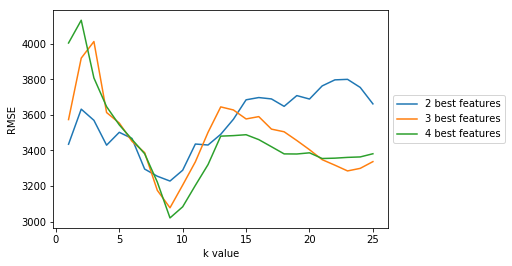

In [14]:
%matplotlib inline

for k,v in rmse_results_4.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(rmse_results_4.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

The model 4 best result considering RMSE is the '4 best feature' option with a k value of 9, with a RMSE of 3020.35, the lowest so far in this project. Considering just the option of number of best features utilized, the 4 best features has the lowest average RMSE, with a value of 3444.83. The K value of 9 also has the lowest average RMSE, with a value of 3108.427508.